In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Download fuel consumption dataset "FuelConsumption.csv", which contains model specific fuel consumption ratings and estimated carbon dioxide emissions.
### • Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size.
### • split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.
### • Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verifythe accuracy by calculating Mean absolute error, Residual sum of squares, R2- score and comment on which model is the best.

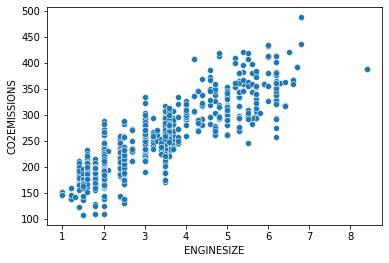

In [3]:
#selecting the features
df_model = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

#plotting emission with respect to engine size
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df_model)

#splitting the data
X = df_model.drop('CO2EMISSIONS', axis=1)
y = df_model['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
#using linear regression on the data
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2-Score: ', r2_score(y_test, y_pred))
print('Residual Sum of Squares: ', np.sum(np.square(y_pred - y_test)))

Mean Absolute Error:  16.53930041890349
R2-Score:  0.8751447816602106
Residual Sum of Squares:  161656.61133440863


#### Using polynomial regression on the data

In [5]:
def PolynomialRegr():
    for i in range(3,6):
        print('For degree = ', i,':-')
        poly = PolynomialFeatures(degree=i, include_bias=False)
        poly_features = poly.fit_transform(X_train)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y_train)
        poly_test = poly.fit_transform(X_test)
        y_pred2 = poly_reg_model.predict(poly_test)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred2))
        print('R2-Score: ', r2_score(y_test, y_pred2))
        print('Residual Sum of Squares: ', np.sum(np.square(y_pred2 - y_test)))    
        print()    

In [6]:
PolynomialRegr()

For degree =  3 :-
Mean Absolute Error:  10.2307115793676
R2-Score:  0.9322474349854069
Residual Sum of Squares:  87722.80578346399

For degree =  4 :-
Mean Absolute Error:  8.250441311667204
R2-Score:  0.9407945298013031
Residual Sum of Squares:  76656.43304338807

For degree =  5 :-
Mean Absolute Error:  8.236270687338918
R2-Score:  0.942441691637149
Residual Sum of Squares:  74523.76606924877



### The R2 score of the polynomial regression with degree = 4 is the highest and that has the lowest Residual sum of squares so that is the best model to be used.
### The linear regression has a low Mean Absolute Error but has a very high Residual Sum of Squares and so there is a high degree of variability in the prediction of that model.